In [1]:
%run ../../algorithmeX.ipynb

## [Polyhexs](https://fr.wikipedia.org/wiki/Polyhex)

Pour tous $i,j\in \mathbf Z$, on définit l'*hexagone* $(i,j)$ selon le schéma suivant (l'idée est issue du TAOCP Vol 4B de D. Knuth p. 162 ex. 315)

![grille](grille.png)

L'origine est le centre de l'hexagone $(0,0)$.

Les principes sont les mêmes que pour les [polyominos](../puzzles-carres/puzzles-carres.ipynb).

Ici, il y a 12 isométries de l'hexagone dont 6 sont directes.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['toolbar'] = 'None'
import random

snsSet3Set2Colors = [(0.5529411764705883, 0.8274509803921568, 0.7803921568627451), (1.0, 1.0, 0.7019607843137254), (0.7450980392156863, 0.7294117647058823, 0.8549019607843137), (0.984313725490196, 0.5019607843137255, 0.4470588235294118), (0.5019607843137255, 0.6941176470588235, 0.8274509803921568), (0.9921568627450981, 0.7058823529411765, 0.3843137254901961), (0.7019607843137254, 0.8705882352941177, 0.4117647058823529), (0.9882352941176471, 0.803921568627451, 0.8980392156862745), (0.8509803921568627, 0.8509803921568627, 0.8509803921568627), (0.7372549019607844, 0.5019607843137255, 0.7411764705882353), (0.8, 0.9215686274509803, 0.7725490196078432), (1.0, 0.9294117647058824, 0.43529411764705883), (0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]
snsPastelColors = [(0.984313725490196, 0.7058823529411765, 0.6823529411764706), (0.7019607843137254, 0.803921568627451, 0.8901960784313725), (0.8, 0.9215686274509803, 0.7725490196078432), (0.8705882352941177, 0.796078431372549, 0.8941176470588236), (0.996078431372549, 0.8509803921568627, 0.6509803921568628), (1.0, 1.0, 0.8), (0.8980392156862745, 0.8470588235294118, 0.7411764705882353), (0.9921568627450981, 0.8549019607843137, 0.9254901960784314), (0.9490196078431372, 0.9490196078431372, 0.9490196078431372), (0.7019607843137254, 0.8862745098039215, 0.803921568627451), (0.9921568627450981, 0.803921568627451, 0.6745098039215687), (0.796078431372549, 0.8352941176470589, 0.9098039215686274), (0.9568627450980393, 0.792156862745098, 0.8941176470588236), (0.9019607843137255, 0.9607843137254902, 0.788235294117647), (1.0, 0.9490196078431372, 0.6823529411764706), (0.9450980392156862, 0.8862745098039215, 0.8), (0.8, 0.8, 0.8)]
snsTab20Colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.596078431372549, 0.8745098039215686, 0.5411764705882353), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (1.0, 0.596078431372549, 0.5882352941176471), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.7686274509803922, 0.611764705882353, 0.5803921568627451), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.8588235294117647, 0.8588235294117647, 0.5529411764705883), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

palette = snsPastelColors

def randomColor(seed = None):
    if seed is not None:
        random.seed(str(seed))
    return random.choice(palette)

In [3]:
class PIECE:

    # une piece est un ensemble (frozenset) de couples
    def __init__(self,nom,piece,couleur = None):
        self.nom = nom
        self.piece = PIECE.normalise(piece)
        self.largeur = max(x for x,_ in self.piece) - min(x for x,_ in self.piece) + 1
        self.hauteur = max(y for _,y in self.piece) - min(y for _,y in self.piece) + 1
        self.couleur = couleur
      

    def __hash__(self):
        return hash(self.piece)

    def __eq__(self,q):
        return self.piece == q.piece

    def __str__(self):
        return str((self.nom,self.piece))

    def normalise(piece):
        min_x = min(x for x,_ in piece)
        min_y = min(y for _,y in piece)
        return frozenset((x - min_x, y - min_y) for x, y in piece)

    def transposee(self):
        return PIECE(self.nom, frozenset((x + y, -y) for x, y in self.piece))

    def rotation(self):
        return PIECE(self.nom, frozenset((x + y, -x) for x, y in self.piece))

    def isometriquesPlus(self):
        l = [self]
        for _ in range(5):
            p = l[-1].rotation()
            l.append(p)
        return list(set(l))
    
    def isometriques(self):
        l1 = self.isometriquesPlus()
        l2 = self.transposee().isometriquesPlus()
        return(list(set(l1 + l2)))
        
    def chgeBase(i,j):
        return 1.73205080756888 * (i + .5 * j), 1.5 * j 
    
    def hexagone():
         c, s = .8660254037, .5
         return ((c, 0., -c, -c, 0., c), (s, 1., s, -s, -1., -s))
    
    def plotHexagone(ax,i,j,**kwargs):
        x, y =  PIECE.chgeBase(i,j)
        h, k = PIECE.hexagone()
        ax.fill(list(map(lambda u: x + u, h)), list(map(lambda v: y + v, k)), **kwargs)

    def polygoneOfCouples(e):
        """e est un ensemble de couples d'entiers (i,j)
        representant une piece non nécessairement normalisée.
        Renvoie une liste de deux tuples pour le dessin de la piece.
        """
        h, k = PIECE.hexagone()
        segments = set()
        for i,j in e:
            x, y = PIECE.chgeBase(i,j)
            if (i + 1, j)     not in e: segments.add(((x + h[5], x + h[0]),(y + k[5],y + k[0])))
            if (i,     j + 1) not in e: segments.add(((x + h[0], x + h[1]),(y + k[0],y + k[1])))
            if (i - 1, j + 1) not in e: segments.add(((x + h[1], x + h[2]),(y + k[1],y + k[2])))
            if (i - 1, j)     not in e: segments.add(((x + h[2], x + h[3]),(y + k[2],y + k[3])))
            if (i,     j - 1) not in e: segments.add(((x + h[3], x + h[4]),(y + k[3],y + k[4])))
            if (i + 1, j - 1) not in e: segments.add(((x + h[4], x + h[5]),(y + k[4],y + k[5])))
        return segments
    
    def plotPolyhex(ax, e, couleur):
        for s in PIECE.polygoneOfCouples(e):
            ax.plot(*s, linewidth = 1, color = 'black')
        for i, j in e:
            PIECE.plotHexagone(ax, i, j,  facecolor = couleur, edgecolor='black', linewidth=.01)
        
    def plot(self):
        
        fig = plt.figure(facecolor='w', 
                         figsize = (self.largeur * 1.73205080756888 / 4., self.hauteur * 1.5 / 4.))
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        ax.set_title(self.nom)
        c = 'white' if self.couleur is None else self.couleur
        PIECE.plotPolyhex(ax, self.piece, c)

#### Génération des polyhexs de taille donnée
$N=8$

On calcule une liste $\texttt{polyhexs}$ telle que, pour $1\leqslant n\leqslant N$, $\texttt{polyhexs[}n\texttt{]}=$ la liste des polyhexs de taille $n$.

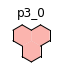

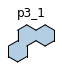

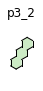

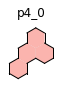

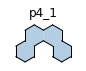

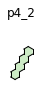

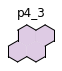

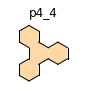

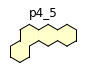

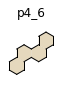

In [4]:
N = 8

def genPolys(p):
    """
    p est l'ensemble des x.piece quand x parcourt l'ensembles des polyhexs de taille n
    genPolys(p) renvoie  l'ensemble des x.piece quand x parcourt l'ensembles des polyhexs de taille n + 1
    """
    q = set()
    for piece0 in p:
        for i0,j0 in piece0:
            for i, j in [(i0, j0 + 1), (i0, j0 - 1), (i0 + 1, j0), 
                         (i0 - 1, j0),(i0 - 1, j0 + 1), (i0 + 1, j0 - 1)]:
                if (i, j) not in piece0:
                    Piece = PIECE('', piece0 | frozenset([(i, j)]))
                    if q.isdisjoint(Piece.isometriques()):
                        q.add(Piece)
    return {x.piece for x in q}

_p = [set(),{frozenset([(0,0)])}]
for n in range(N - 1): 
    _p.append(genPolys(_p[-1]))
    
polyhexs = [[PIECE(f'p{i}_{j}', piece, couleur=palette[j%(len(palette))]) 
                for j, piece in enumerate(sorted(list(e),key = hash))]
                for i, e in enumerate(_p)]

for e in polyhexs: 
    for p in e: globals()[p.nom] = p    

# Exemple, les 3 trihexs et les 7 tetrahexs
# Noter que, par ex., p4_3 == polyhexs[4][3]
for p in polyhexs[3] + polyhexs[4]: p.plot()


In [5]:

class PUZZLE:

    def __init__(self,pieces,
                      min_i,max_i,min_j,max_j,
                      conditions = None,
                      strict = True):
        """pieces : liste de PIECE
        min_i,max_i,min_j,max_j : definition du plateau
        conditions : couple d'entiers -> booleen restreignant le plateau
    
        1er cas  : strict = True
            Pour chacun des noms des pieces, il faut placer 
            une et une seule piece portant ce nom.
            Les elements de E sont les noms des pieces
            et les cases (couples d'entiers) du plateau.
            Chaque element de F contient un et un seul nom
            et les cases du plateau utilisees par une piece de ce nom..
        
        2eme cas : strict = False
            Pour chaque piece de pieces, on dispose,
            pour resoudre le puzzle, d'autant d'exemplaires
            que l'on veut de la piece.
            Les elements de E sont les cases du plateau.
        """
        self.min_i = min_i
        self.max_i = max_i
        self.min_j = min_j
        self.max_j = max_j
        self.strict = strict
        self.pieces = pieces
        if not conditions:
            conditions = lambda i,j: True
        lignes = dict()
        nbLignes = 0
        for p in pieces:
            for u in range(min_i, max_i - p.largeur + 2):
                for v in range(min_j, max_j - p.hauteur + 2):
                    ligne = [p.nom] if self.strict else []
                    match = True
                    for i,j in p.piece:
                        ic, jc = i + u, j + v
                        if conditions(ic,jc):
                            ligne.append((ic,jc))
                        else:
                            match = False
                            break
                    if match:
                        lignes[nbLignes] = ligne
                        nbLignes += 1
        self.lignes = lignes
        
    def solve(self):
        
        F = self.lignes
        return AlgorithmeX(F).solve()

    def printSolution(self,sol):     
        for l in sol: print(self.lignes[l])

    def plotSolution(self,sol):
                
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        if not self.strict:
            random.seed('314')
        for l in sol:
            e = set()
            for c in self.lignes[l]:
                if type(c) == tuple:
                    e.add(c)
                else:
                    couleur = eval(c).couleur 
            if not self.strict: couleur = randomColor()
            PIECE.plotPolyhex(ax, e, couleur)

### Exemple

['p4_5', (3, 1), (4, 1), (5, 1), (6, 0)]
['p4_6', (3, -2), (3, -1), (2, 0), (4, -3)]
['p3_0', (3, 3), (4, 2), (3, 2)]
['p4_1', (5, -3), (6, -3), (6, -2), (4, -2)]
['p4_2', (2, 1), (3, 0), (4, -1), (5, -2)]
['p4_0', (0, 3), (1, 3), (2, 2), (2, 3)]
['p3_2', (2, -2), (3, -3), (1, -1)]
['p4_3', (5, -1), (5, 0), (6, -1), (4, 0)]
['p4_4', (0, 0), (1, 0), (1, 1), (2, -1)]
['p3_1', (0, 2), (1, 2), (0, 1)]


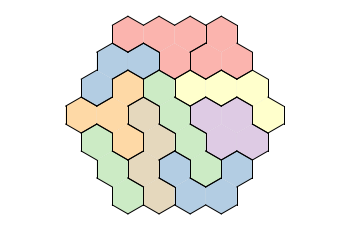

In [6]:
# 12 x 12290 solutions

triTetraHexs = []
for p in polyhexs[3] + polyhexs[4]:
    triTetraHexs += p.isometriques()

puzzle = PUZZLE(triTetraHexs,0,6,-3,3,
                conditions = (lambda i,j: 0 <= i + j <= 6))
    
s = puzzle.solve()
        
sol = next(s)
puzzle.printSolution(sol)
puzzle.plotSolution(sol)

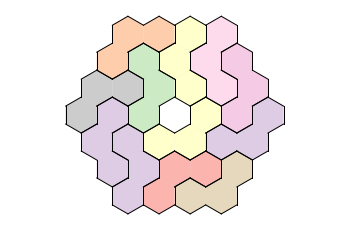

In [7]:
puzzle = PUZZLE(p3_1.isometriques(), 0,6,-3,3,
                conditions = (lambda i,j: 0 <= i + j <= 6 and (i,j) != (3,0)), strict=False)
s = puzzle.solve()
for _ in range(15):
    p = next(s)
puzzle.plotSolution(p)

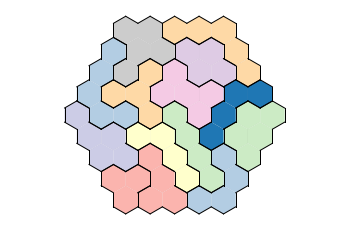

In [8]:
p5_5_ = list(set(p5_5.isometriques()) - set(p5_5.isometriquesPlus()))[0]
p5_5_ = PIECE('p5_5_', p5_5_.piece, couleur = (.8,.8,.9))
p4_5_ = list(set(p4_5.isometriques()) - set(p4_5.isometriquesPlus()))[0]
p4_5_ = PIECE('p4_5_', p4_5_.piece)
l = []
for p in [p3_0,p4_0,p4_1,p4_2,p4_3,p4_4,p4_5,p4_5_,p5_2,p5_4,p5_5_,p5_12,p5_16,p5_18]:
    l += p.isometriquesPlus()
puzzle = PUZZLE(l,0,8,0,8,conditions = (lambda i,j: 4 <= i + j <= 12))
s = puzzle.solve()        
sol = next(s)
puzzle.plotSolution(sol)
